In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
map_data = np.loadtxt('data/map_data.txt')
gt_data = np.loadtxt('data/gt_data.txt')

[]

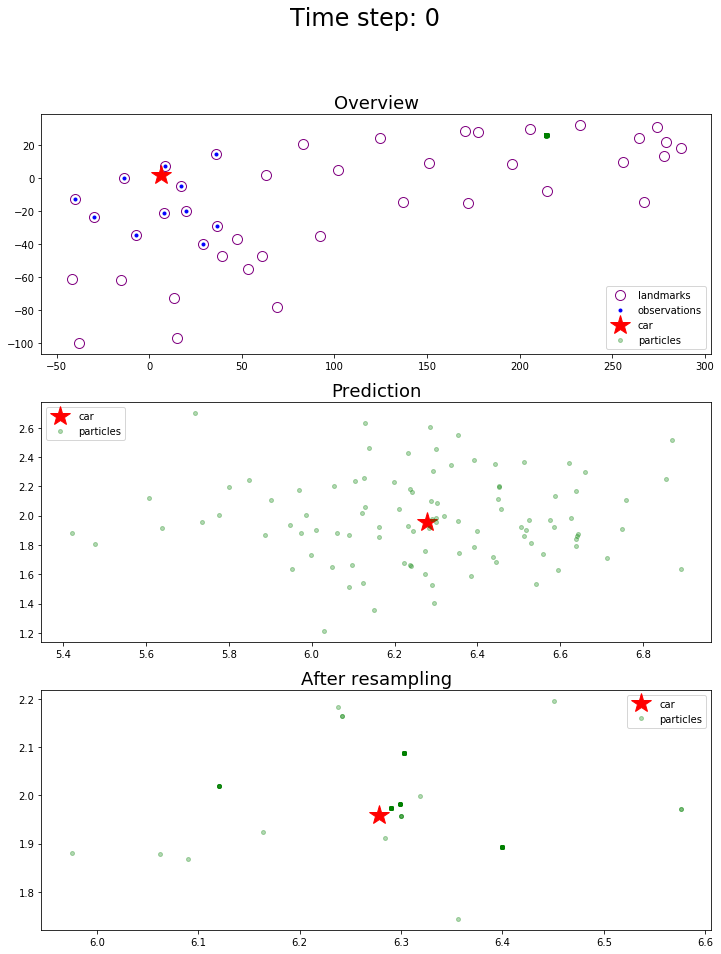

In [51]:
step = 0
ob_data = np.loadtxt('data/observation/observations_{:06d}.txt'.format(step+1))

px = gt_data[step, 0]
py = gt_data[step, 1]
theta = gt_data[step, 2]

# Coordinate transfer from the car's coordinate system to the map's.
obs_x = px + ob_data[:, 0]*np.cos(theta) - ob_data[:, 1]*np.sin(theta)
obs_y = py + ob_data[:, 0]*np.sin(theta) + ob_data[:, 1]*np.cos(theta)

fig, ax = plt.subplots(3, 1, figsize=(12, 15))

ax[0].plot(map_data[:, 0], map_data[:, 1], 'o', mfc='white', mec='purple', ms=10, label='landmarks')
ax[0].plot(obs_x, obs_y, 'b.', label='observations')
ax[0].plot(px, py, 'r*', ms=20, label='car')
ax[0].plot(particles[:,0], particles[:,1], 'g.', ms=8, alpha=0.3, label='particles')
ax[0].legend()
ax[0].set_title('Overview', fontsize=18)

try:
    prior_particles = np.loadtxt('output/prior_particles{:06d}.txt'.format(step))
    ax[1].plot(px, py, 'r*', ms=20, label='car')
    ax[1].plot(prior_particles[:,0], prior_particles[:,1], 'g.', ms=8, alpha=0.3, label='particles')
    ax[1].legend()
    ax[1].set_title('Prediction', fontsize=18)
except:
    pass
    
try:
    particles = np.loadtxt('output/particles{:06d}.txt'.format(step))
    ax[2].plot(px, py, 'r*', ms=20, label='car')
    ax[2].plot(particles[:,0], particles[:,1], 'g.', ms=8, alpha=0.3, label='particles')
    ax[2].legend()
    ax[2].set_title('After resampling', fontsize=18)
except:
    pass

plt.suptitle('Time step: {}'.format(step), fontsize=24)
plt.plot()